In [8]:
import numpy as n

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
sim_time_hrs = 300
exp_start = 200
exp_end = 248

constant_load = 750
transceiver_load = 4000
transceiver_period_hrs = 3
transceiver_ontime_hrs = 1.0/6.0

payload_off_load = 1000
payload_on_load = 2500

In [35]:
t_secs = n.array(range(sim_time_hrs*3600))
t_mins = n.array(range(0, sim_time_hrs*60))

pwr_secs = n.zeros(t_secs.shape)
pwr_mins = n.zeros(t_mins.shape)

In [36]:
for i in range(pwr_secs.shape[0]):
    pwr_secs[i] += constant_load
    if i > (3600*exp_start) and i < (3600*exp_end):
#         print (i)
        pwr_secs[i] += payload_on_load
    else:
        pwr_secs[i] += payload_off_load
        if i % (3600*transceiver_period_hrs) < (3600.0*transceiver_ontime_hrs):
            pwr_secs[i] += transceiver_load
    
        

In [50]:
exp_start

200

Text(0.5, 0, 'Mission Time (s)')

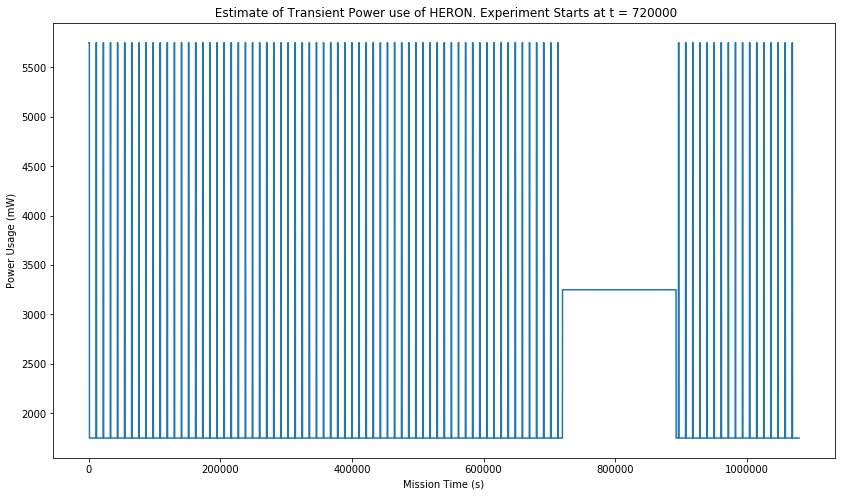

In [51]:
figure = figsize(14,8 )
plot(t_secs, pwr_secs)
title(' Estimate of Transient Power use of HERON. Experiment Starts at t = ' + str(exp_start*3600))
# ylim(0, 6000)
ylabel('Power Usage (mW)')
xlabel('Mission Time (s)')

In [52]:
import csv

In [59]:
pwr_secs.reshape((pwr_secs.shape[0], 1))

array([[5750.],
       [5750.],
       [5750.],
       ...,
       [1750.],
       [1750.],
       [1750.]])

In [65]:
with open('/home/ali/UTAT/mission-sim/power_consumption_secs_mW.csv', 'w') as writefile:
    writer = csv.writer(writefile)
    writer.writerows(pwr_secs.reshape((pwr_secs.shape[0], 1)).tolist())